# EDA on Vehicle Insurance Customer Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
customerD = pd.read_csv("customer_details.csv")
customerPD = pd.read_csv("customer_policy_details.csv")

In [9]:
customerD.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='object')

In [10]:
customerD=customerD.rename(columns={'0':'customer_id', '1':'Gender', '2':'age', '3':'driving licence present', '4':'region code','5':'previously insured', '6':'vehicle age', '7':'vehicle damage'})
customerD.head(2)

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No


In [11]:
customerPD=customerPD.rename(columns={'0':'customer_id', '1':'annual premium (in Rs)', '2':'sales channel code', '3':'vintage','4':'response'})
customerPD.columns

Index(['customer_id', 'annual premium (in Rs)', 'sales channel code',
       'vintage', 'response'],
      dtype='object')

In [12]:
customerD.head(2)

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No


## Column name for customer_policy table

In [13]:
customerPD.head(2)

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0


In [14]:
customerPD=customerPD.rename(columns={'0':'customer_id', '1':'annual premium (in Rs)', '2':'sales channel code', '3':'vintage','4':'response'})
customerPD.columns

Index(['customer_id', 'annual premium (in Rs)', 'sales channel code',
       'vintage', 'response'],
      dtype='object')

In [15]:
customerPD.describe()

,customer_id,annual premium (in Rs),sales channel code,vintage,response
count,380722.000000,380763.000000,380709.000000,380721.000000,380748.000000
mean,190547.491663,30563.700273,112.035752,154.342437,0.122543
std,110013.824148,17200.257877,54.204942,83.669600,0.327912
min,1.000000,2630.000000,1.000000,10.000000,0.000000
25%,95276.250000,24406.000000,29.000000,82.000000,0.000000
50%,190536.500000,31668.000000,133.000000,154.000000,0.000000
75%,285818.750000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,540165.000000,163.000000,299.000000,1.000000


In [16]:
customerD.describe()

,customer_id,age,driving licence present,region code,previously insured
count,380723.000000,380741.000000,380716.000000,380717.000000,380728.000000
mean,190548.776244,38.822827,0.997867,26.388575,0.458246
std,110016.805160,15.512120,0.046133,13.230361,0.498254
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,95269.500000,25.000000,1.000000,15.000000,0.000000
50%,190543.000000,36.000000,1.000000,28.000000,0.000000
75%,285822.500000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000


In [17]:
Q1 = customerPD.quantile(0.25)

Q3 = customerPD.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

customer_id               190542.5
annual premium (in Rs)     14994.0
sales channel code           123.0
vintage                      145.0
response                       0.0
dtype: float64


In [18]:
Q1 = customerD.quantile(0.25)

Q3 = customerD.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

customer_id                190553.0
age                            24.0
driving licence present         0.0
region code                    20.0
previously insured              1.0
dtype: float64


C:\Users\adman\AppData\Local\Temp\ipykernel_8184\1053316439.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final=customerPD[~((customerPD<(Q1-1.5*IQR)) | (customerPD>(Q3+1.5*IQR)))]


<AxesSubplot:>

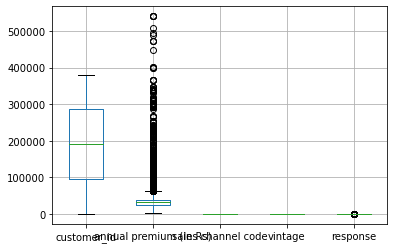

In [19]:
df_final=customerPD[~((customerPD<(Q1-1.5*IQR)) | (customerPD>(Q3+1.5*IQR)))]
df_final.boxplot()

In [20]:
customerPD.isnull().sum()

customer_id               387
annual premium (in Rs)    346
sales channel code        400
vintage                   388
response                  361
dtype: int64

In [21]:
customerD.isnull().sum()

customer_id                386
Gender                     368
age                        368
driving licence present    393
region code                392
previously insured         381
vehicle age                381
vehicle damage             407
dtype: int64

In [22]:
customerD["customer_id"].isna().sum()

386

In [23]:
customerPD["customer_id"].isna().sum()
customerPD["customer_id"].count()
customerPD["customer_id"].count()

380722

In [24]:
customerPD['annual premium (in Rs)'].fillna((customerPD['annual premium (in Rs)'].mean()), inplace=True)
customerPD['annual premium (in Rs)'].mean()

30563.700272873237

In [25]:
customerPD['vintage'].fillna((customerPD['vintage'].mean()), inplace=True)
customerPD['vintage'].mean()

154.34243711274107

In [26]:
customerPD.isnull().sum()

customer_id               387
annual premium (in Rs)      0
sales channel code        400
vintage                     0
response                  361
dtype: int64

In [27]:
customerPD['response'].fillna((customerPD['response'].mode()[0]), inplace=True)
customerPD['response'].mode()

0    0.0
Name: response, dtype: float64

In [28]:
customerD=customerD.rename(columns={'driving licence present':'driving_licence_present','previously insured':'previously_insured', 'vehicle age':'vehicle_age', 'vehicle damage':'vehicle_damage'})
Gender = {'Male': 0, 'Female': 1}

In [29]:
previously_insured = {0: 1, 1: 0}
vehicle_age = {'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0}
vehicle_damage = {'Yes': 1, 'No': 0}
customerD['Gender'] = customerD['Gender'].map(Gender)

In [30]:
#customerD['driving_license_present'] = customerD['driving_license_present'].map(driving_license_present)
customerD['previously_insured'] = customerD['previously_insured'].map(previously_insured)
customerD['vehicle_age'] = customerD['vehicle_age'].map(vehicle_age)
customerD['vehicle_damage'] = customerD['vehicle_damage'].map(vehicle_damage)
customerD.head(2)

,customer_id,Gender,age,driving_licence_present,region code,previously_insured,vehicle_age,vehicle_damage
0,1.0,0.0,44.0,1.0,28.0,1.0,2.0,1.0
1,2.0,0.0,76.0,1.0,3.0,1.0,1.0,0.0


In [31]:
customerD=customerD.dropna(subset=['customer_id'])
customerD=customerD.dropna(subset=['vehicle_damage'])
customerD=customerD.dropna(subset=['vehicle_age'])
customerD=customerD.dropna(subset=['previously_insured'])
customerD=customerD.dropna(subset=['region code'])
customerD=customerD.dropna(subset=['driving_licence_present'])
customerD=customerD.dropna(subset=['Gender'])

## OUTLIERS

C:\Users\adman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual premium (in Rs)'>

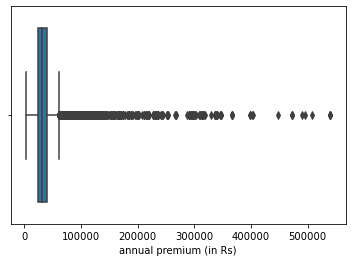

In [32]:
sns.boxplot(customerPD['annual premium (in Rs)'])

In [33]:
percentile25 = customerPD['annual premium (in Rs)'].quantile(0.25)
percentile75 = customerPD['annual premium (in Rs)'].quantile(0.75)

C:\Users\adman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

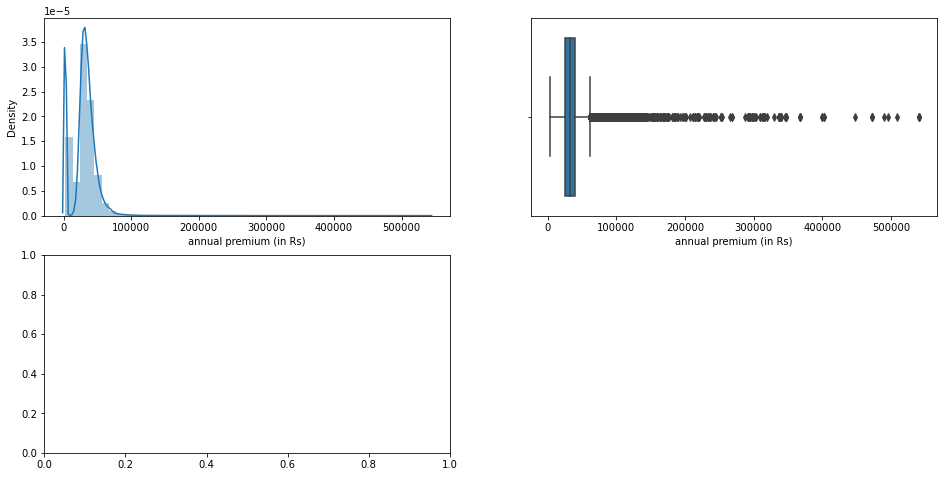

In [34]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(customerPD['annual premium (in Rs)'])
plt.subplot(2,2,2)
sns.boxplot(customerPD['annual premium (in Rs)'])
plt.subplot(2,2,3)

C:\Users\adman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vintage'>

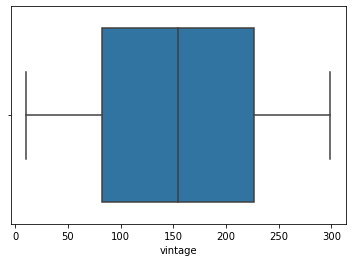

In [35]:
sns.boxplot(customerPD['vintage'])

C:\Users\adman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales channel code'>

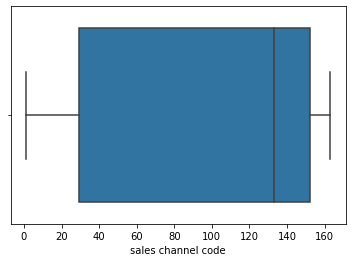

In [37]:
sns.boxplot(customerPD['sales channel code'])

## outliers customerd

C:\Users\adman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

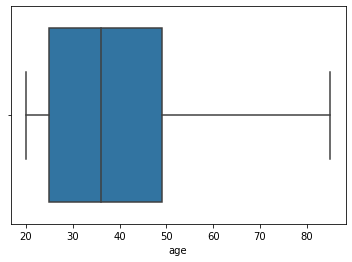

In [38]:
sns.boxplot(customerD['age'])

C:\Users\adman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicle_damage'>

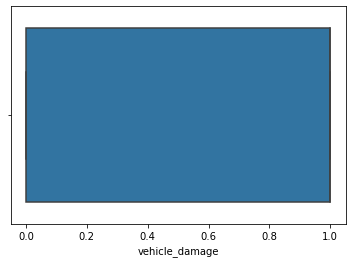

In [39]:
sns.boxplot(customerD['vehicle_damage'])

C:\Users\adman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previously_insured'>

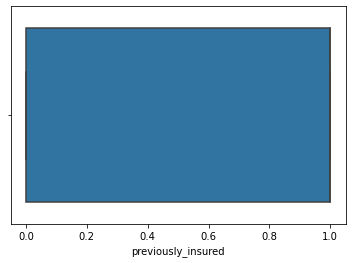

In [40]:
sns.boxplot(customerD['previously_insured'])

C:\Users\adman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region code'>

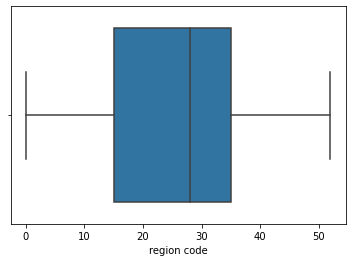

In [41]:
sns.boxplot(customerD['region code'])

C:\Users\adman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicle_age'>

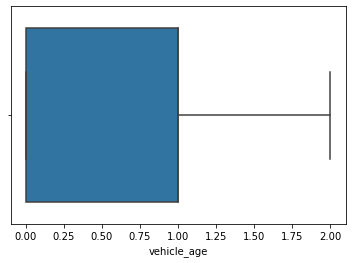

In [42]:
sns.boxplot(customerD['vehicle_age'])

In [44]:
customerD['type'] = 'customerD'
customerPD['type'] = 'customerPD'

master_data = pd.concat([customerD, customerPD])
master_data.head(2)

,customer_id,Gender,age,driving_licence_present,region code,previously_insured,vehicle_age,vehicle_damage,type,annual premium (in Rs),sales channel code,vintage,response
0,1.0,0.0,44.0,1.0,28.0,1.0,2.0,1.0,customerD,NaN,NaN,NaN,NaN
1,2.0,0.0,76.0,1.0,3.0,1.0,1.0,0.0,customerD,NaN,NaN,NaN,NaN


## 4.Company needssome important information from the master table to make desicions for future group.They needs following information

C:\Users\adman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adman\Anaconda3\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\adman\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\adman\Anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\adman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please 

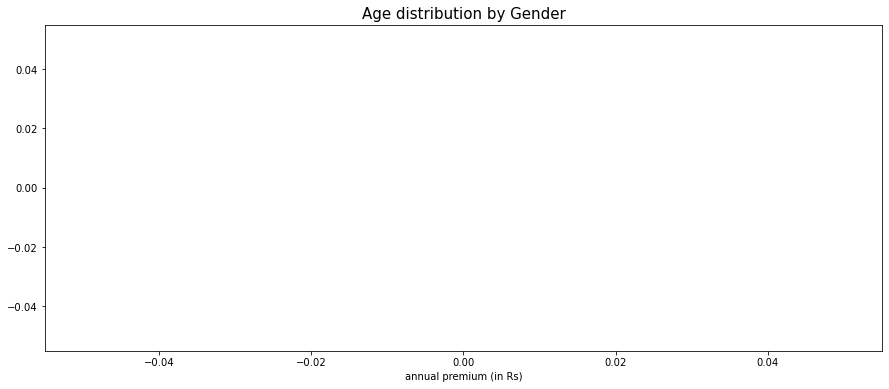

C:\Users\adman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adman\Anaconda3\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\adman\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\adman\Anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\adman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please 

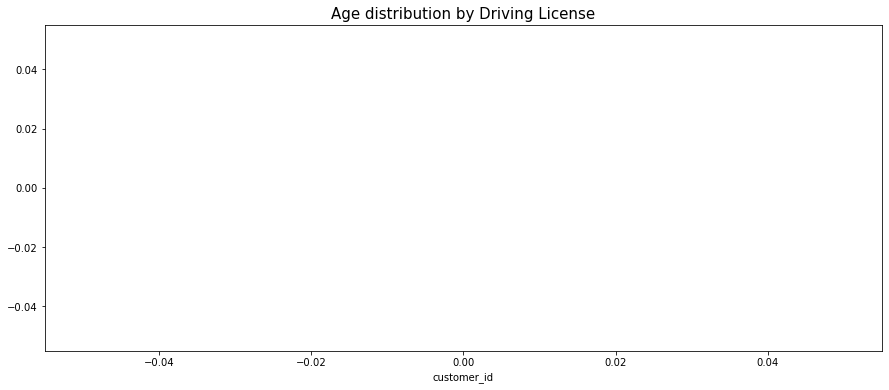

In [45]:
plt.figure(figsize = (15, 6))
sns.distplot(master_data.loc[(master_data['Gender'] == 1), 'annual premium (in Rs)'], kde_kws = {"color": "b", "lw": 1, "label": "Male"})
sns.distplot(master_data.loc[(master_data['Gender'] == 0), 'annual premium (in Rs)'], kde_kws = {"color": "r", "lw": 1, "label": "Female"})
plt.title('Age distribution by Gender', fontsize = 15)
plt.show()
plt.figure(figsize = (15, 6))
sns.distplot(master_data.loc[(master_data['age'] == 0), 'customer_id'], kde_kws = {"color": "b", "lw": 1, "label": "Not Licensed for driving"})
sns.distplot(master_data.loc[(master_data['age'] == 1), 'customer_id'], kde_kws = {"color": "r", "lw": 1, "label": "Licensed for Driving"})
plt.title('Age distribution by Driving License', fontsize = 15)
plt.show()

## Is there any relation between Person age and annual premium

#Hint: use correlation function (Correlation describes the relationship between two variables).

Correlation coefficient < -0.5 - Strong negative relationship

Correlation coefficient > 0.5 - Strong positive relationship

0.5 < Correlation coefficient < 0.5 - There is no relationship.

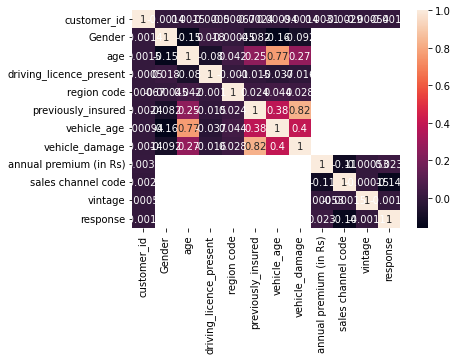

In [46]:
corrMatrix = master_data.corr()
sns.heatmap(corrMatrix, annot = True)
plt.show()